In [26]:
import kagglehub
from time import time
import numpy as np

num_samples=1000
dim=300
samples = np.random.randn(num_samples, dim)
    
# Normalize the samples to lie on the surface of the unit sphere
norms = np.linalg.norm(samples, axis=1)[:, np.newaxis]  # Compute the norm of each sample
centroids = samples / norms  # Normalize to unit sphere
    

In [27]:
t1=time()
path = kagglehub.dataset_download("thanakomsn/glove6b300dtxt")
glove_path = path + "/glove.6B.300d.txt" 
with open(glove_path,'r') as file:
    i=0
    L=[]; word=[]
    for line in file:
        X=line.split()
        word.append(X[0])
        vec=(np.array([float(x) for x in X[1:]]))
        vec=vec/np.sqrt(np.sum(vec**2))
        L.append(vec)
        i+=1
        print(i,end='\r')
        if i>10000:
            break
t2=time()
print()
print(t2-t1)

10001
0.8326609134674072


In [28]:
word=np.array(word)
Vecs=np.stack(L)
Vecs.shape

(10001, 300)

In [29]:
word[-10:]

array(['23-year', 'communique', 'hawk', 'necessity', 'petty',
       'stretching', 'taxpayer', 'resistant', 'quinn', 'persecution'],
      dtype='<U18')

In [30]:
np.sqrt(np.sum(centroids**2,axis=1))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [31]:
centroids.shape

(1000, 300)

In [71]:
import faiss

d = 300  # Dimensionality
n = 1000  # Number of points
X = Vecs[:1000,:].astype('float32')

# Normalize the vectors to unit length (this converts cosine distance to L2 distance)
faiss.normalize_L2(X)

# Create the FAISS index (L2 distance)
index = faiss.IndexFlatL2(d)

# Add normalized points to the index
index.add(X)

In [101]:
%%time
# Query for the nearest neighbor to a new point
start=1000
query_points = Vecs[start:,:].astype('float32')
faiss.normalize_L2(query_points)  # Normalize the query point
distances, indices = index.search(query_points, k=1000)

#print(f"Nearest neighbor index: {indices}")
#print(f"Cosine distance: {distances}")

CPU times: user 520 ms, sys: 24 ms, total: 544 ms
Wall time: 517 ms


In [102]:
indices.shape, distances.shape

((9001, 1000), (9001, 1000))

In [103]:
distances[0,:]

array([0.57585347, 0.6099658 , 0.7807189 , 0.82251346, 0.8371434 ,
       0.84925044, 0.8497627 , 0.8583375 , 0.87826836, 0.8842126 ,
       0.88804924, 0.8929106 , 0.89317477, 0.8942623 , 0.8986716 ,
       0.9043404 , 0.904642  , 0.90480053, 0.9153416 , 0.9166148 ,
       0.92663836, 0.92893124, 0.942099  , 0.94355655, 0.9537209 ,
       0.95531225, 0.9562298 , 0.95956576, 0.96055627, 0.9608033 ,
       0.96704423, 0.968755  , 0.97036576, 0.97143054, 0.9732064 ,
       0.9757196 , 0.98008585, 0.98040986, 0.98774445, 0.988647  ,
       0.99242115, 0.99420595, 0.99578846, 0.9963814 , 0.9979712 ,
       1.0001988 , 1.001221  , 1.0141791 , 1.0157914 , 1.019559  ,
       1.0214026 , 1.0241723 , 1.0241989 , 1.0260794 , 1.0268705 ,
       1.0284421 , 1.0291047 , 1.0297287 , 1.0303369 , 1.0315349 ,
       1.0316101 , 1.0324302 , 1.0328342 , 1.033061  , 1.0337443 ,
       1.0343864 , 1.0344102 , 1.0371414 , 1.0445862 , 1.048064  ,
       1.0532314 , 1.0538654 , 1.05536   , 1.0587549 , 1.06252

In [92]:
for j in range(100):
    print('query ',word[start+j],' nearest ',word[indices[j,0]])

query  themselves  nearest  them
query  firm  nearest  company
query  injured  nearest  killed
query  itself  nearest  it
query  governor  nearest  republican
query  movie  nearest  film
query  range  nearest  low
query  cross  nearest  across
query  track  nearest  song
query  programs  nearest  program
query  1995  nearest  1994
query  forced  nearest  leave
query  includes  nearest  include
query  difficult  nearest  very
query  produced  nearest  production
query  wall  nearest  street
query  rebels  nearest  fighting
query  income  nearest  tax
query  corp.  nearest  inc.
query  chance  nearest  give
query  elected  nearest  election
query  23  nearest  22
query  reach  nearest  reached
query  adding  nearest  added
query  species  nearest  common
query  wants  nearest  want
query  finished  nearest  third
query  rise  nearest  increase
query  killing  nearest  killed
query  spain  nearest  italy
query  joined  nearest  returned
query  italian  nearest  italy
query  language  near

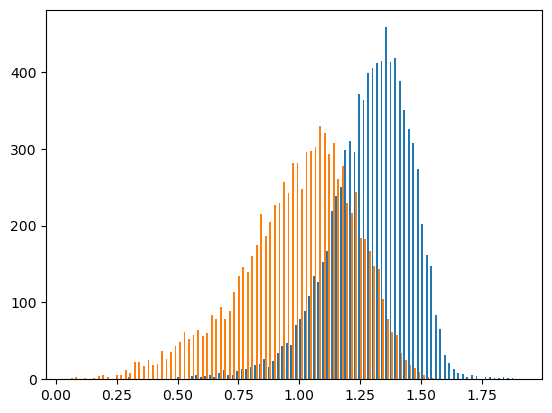

In [105]:
from matplotlib.pylab import *
hist([distances[:,10],distances[:,0]],bins=100);

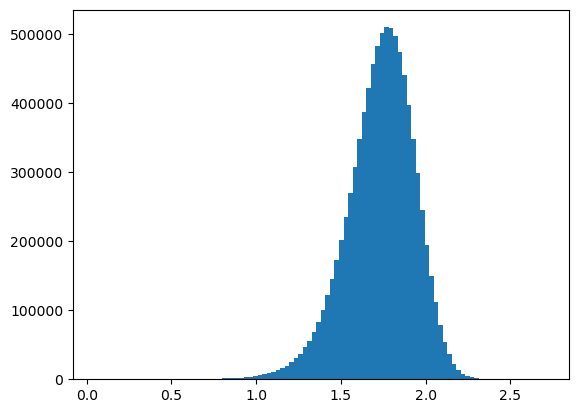

In [106]:
hist(distances.flatten(),bins=100);

In [107]:
sqrt(2)

1.4142135623730951

In [60]:
indices

array([[735],
       [ 36],
       [441],
       [591],
       [349],
       [553],
       [108],
       [902],
       [931],
       [798]])

In [57]:
indices

<function numpy.indices(dimensions, dtype=<class 'int'>, sparse=False)>